<a href="https://colab.research.google.com/github/sohyunan99/sohyun.an/blob/python-project/SEPHORA_%EB%8B%A4%EC%A4%91%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

shutil.copy("/content/drive/MyDrive/Colab Notebooks/기말프로젝트/SEPHORA/product_info.csv", "/content")

'/content/product_info.csv'

In [ ]:
import pandas as pd

productinfo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/기말프로젝트/SEPHORA/product_info.csv')
productinfo

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


In [ ]:
selected_columns = ['product_id', 'loves_count', 'rating', 'reviews', 'price_usd', 'value_price_usd', 'sale_price_usd']
extracted_data = productinfo[selected_columns]
extracted_data

,product_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd
0,P473671,6320,3.6364,11.0,35.0,NaN,NaN
1,P473668,3827,4.1538,13.0,195.0,NaN,NaN
2,P473662,3253,4.2500,16.0,195.0,NaN,NaN
3,P473660,3018,4.4762,21.0,195.0,NaN,NaN
4,P473658,2691,3.2308,13.0,195.0,NaN,NaN
...,...,...,...,...,...,...,...
8489,P467659,2790,4.4286,7.0,150.0,NaN,NaN
8490,P500874,2319,4.6367,556.0,106.0,NaN,NaN
8491,P504428,1475,5.0000,2.0,134.0,179.0,NaN
8492,P504448,840,NaN,NaN,167.0,199.0,NaN


**review를 제외한 독립변수 간의 히트맵 시각화**

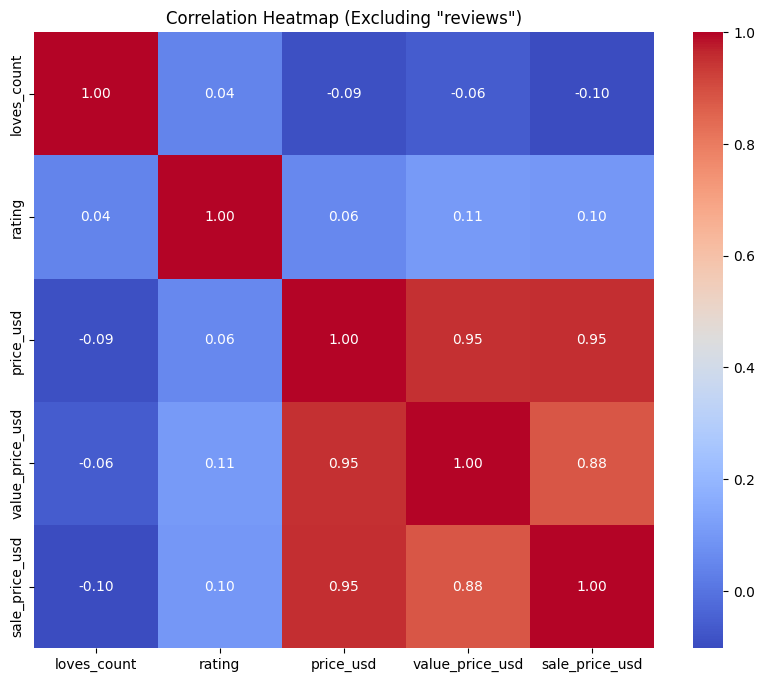

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'review'를 제외한 특성들 간의 상관 관계 행렬 생성
features = ['loves_count', 'rating', 'price_usd', 'value_price_usd', 'sale_price_usd']
corr_matrix = extracted_data[features].corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap (Excluding "reviews")')
plt.show()

In [ ]:
import statsmodels.api as sm

#결측값을 0으로 대체
extracted_data.fillna(0, inplace=True)

# 독립 변수(X, 특징)와 종속 변수(y, 목표) 설정
X = extracted_data[['loves_count', 'rating', 'price_usd', 'value_price_usd', 'sale_price_usd']]
y = extracted_data['reviews']

# 상수항 추가
X = sm.add_constant(X)

# 다중 선형 회귀 모델 적합화
model = sm.OLS(y, X).fit()

# 회귀 분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     1516.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:29:00   Log-Likelihood:                -68722.
No. Observations:                8494   AIC:                         1.375e+05
Df Residuals:                    8488   BIC:                         1.375e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -81.5061     40.648     

<ipython-input-6-08c10375a3de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data.fillna(0, inplace=True)


**'loves_count', 'rating', 'price_usd'로 'out of stock' 여부 예측**

In [ ]:
selected_columns = ['product_id', 'loves_count', 'rating', 'price_usd', 'out_of_stock']
extracted_exclusive = productinfo[selected_columns]
extracted_exclusive

,product_id,loves_count,rating,price_usd,out_of_stock
0,P473671,6320,3.6364,35.0,0
1,P473668,3827,4.1538,195.0,0
2,P473662,3253,4.2500,195.0,0
3,P473660,3018,4.4762,195.0,0
4,P473658,2691,3.2308,195.0,0
...,...,...,...,...,...
8489,P467659,2790,4.4286,150.0,0
8490,P500874,2319,4.6367,106.0,0
8491,P504428,1475,5.0000,134.0,1
8492,P504448,840,NaN,167.0,0


In [ ]:
extracted_exclusive.isna().sum()

product_id        0
loves_count       0
rating          278
price_usd         0
out_of_stock      0
dtype: int64

In [ ]:
extracted_exclusive.dropna(subset=['rating'], inplace=True)

<ipython-input-92-cb94282bb8b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_exclusive.dropna(subset=['rating'], inplace=True)


In [ ]:
extracted_exclusive.isna().sum()

product_id      0
loves_count     0
rating          0
price_usd       0
out_of_stock    0
dtype: int64

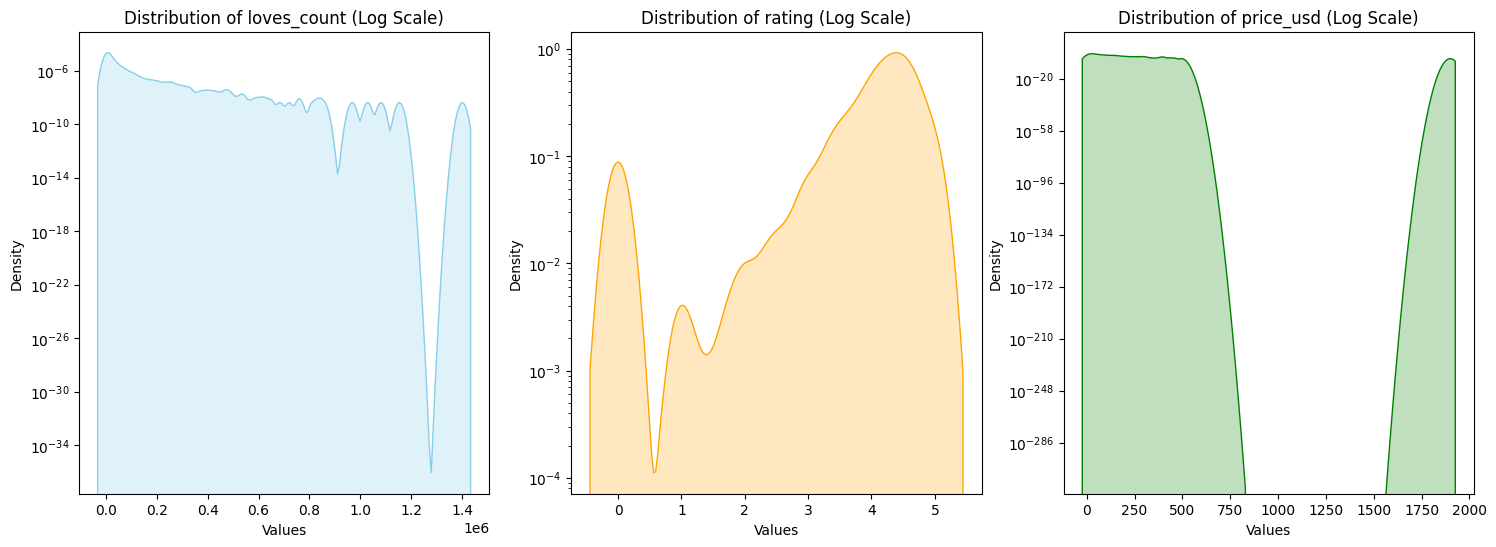

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#'loves_count', 'rating', 'price_usd'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # 1행 3열의 서브플롯 생성

# 각 칼럼에 대한 로그 스케일 적용한 area chart 그리기
sns.kdeplot(data=extracted_exclusive, x='loves_count', fill=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of loves_count (Log Scale)')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Density')
axes[0].set_yscale('log')  # y축에 로그 스케일 적용

sns.kdeplot(data=extracted_exclusive, x='rating', fill=True, ax=axes[1], color='orange')
axes[1].set_title('Distribution of rating (Log Scale)')
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Density')
axes[1].set_yscale('log')  # y축에 로그 스케일 적용

sns.kdeplot(data=extracted_exclusive, x='price_usd', fill=True, ax=axes[2], color='green')
axes[2].set_title('Distribution of price_usd (Log Scale)')
axes[2].set_xlabel('Values')
axes[2].set_ylabel('Density')
axes[2].set_yscale('log')  # y축에 로그 스케일 적용

plt.show()

**다중공선성 검사**

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# product_id는 범주형 변수로, 다중공선성을 계산할 필요가 없으므로 제외합니다.
selected_columns = ['loves_count', 'rating', 'price_usd']
X = extracted_exclusive[selected_columns]

# 상수항을 추가합니다.
X = sm.add_constant(X)

# VIF 계산
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

      Features        VIF
0        const  22.176340
1  loves_count   1.016100
2       rating   1.007962
3    price_usd   1.008106


loves_count, rating, price_usd, out_of_stock: 모든 변수들의 VIF 값이 1에 가깝게 나타났습니다. 이는 각 변수들이 다른 변수들로부터 거의 영향을 받지 않고 있다는 것을 의미합니다. 보통 VIF 값이 1에서 5 사이인 경우 다중공선성의 문제가 거의 없다고 간주합니다.

결과적으로 주어진 변수들 간에 다중공선성의 문제가 거의 없거나 없는 것으로 해석됩니다. 모든 변수들이 다른 변수들에 대해 매우 적은 영향을 받고 있으며, 다중공선성으로 인한 문제는 크게 우려할 필요가 없다고 해석할 수 있습니다.

*다중공선성을 계산할 때 상수항을 추가하는 것은 해당 상수항이 다른 독립 변수들과의 관계에서 어떤 영향을 끼치는지를 고려하기 위해서입니다. 일반적으로 상수항의 VIF 값이 높게 나오는 것은 다중공선성의 문제를 초래하지 않습니다. 따라서 보통 상수항을 포함하여 다중공선성을 평가합니다.

In [ ]:
from sklearn.model_selection import train_test_split

target = extracted_exclusive['out_of_stock']
features = extracted_exclusive[['loves_count', 'rating', 'price_usd']]

# 데이터 분할 (훈련 데이터 80%, 테스트 데이터 20%)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 확인을 위해 각 데이터의 크기 출력
print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

Training data size: (6795, 3)
Testing data size: (1699, 3)


In [ ]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
log_reg = LogisticRegression()

# 모델 훈련
log_reg.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9299587992937022


In [ ]:
from sklearn.metrics import classification_report

# 분류 보고서 출력
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1580
           1       1.00      0.00      0.00       119

    accuracy                           0.93      1699
   macro avg       0.96      0.50      0.48      1699
weighted avg       0.93      0.93      0.90      1699



In [ ]:
import statsmodels.api as sm

# 로지스틱 회귀 모델 생성
log_reg = sm.Logit(y_train, sm.add_constant(X_train))  # X_train에 상수항 추가
result = log_reg.fit()

# Pseudo R-squared 값 출력
print("Pseudo R-squared (McFadden's R-squared):", result.prsquared)

Optimization terminated successfully.
         Current function value: 0.260008
         Iterations 8
Pseudo R-squared (McFadden's R-squared): 0.020363383893144515


In [ ]:
# 모든 계수에 대한 p-value 출력
print("\nP-values for coefficients:")
print(result.pvalues)


P-values for coefficients:
const          7.541370e-17
loves_count    3.054787e-06
rating         1.669054e-07
price_usd      2.122428e-02
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# loves_count, rating, price_usd를 표준화
extracted_exclusive[['loves_count', 'rating', 'price_usd']] = scaler.fit_transform(extracted_exclusive[['loves_count', 'rating', 'price_usd']])


In [ ]:
from sklearn.linear_model import LogisticRegression

# 여기에 데이터 및 모델 훈련 코드가 있다고 가정합니다.

# logistic regression 모델을 훈련한 후에 변수의 가중치 출력
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)  # X_train은 입력 변수, y_train은 목표 변수

# 여기서 X_train은 입력 변수 데이터를 나타냅니다.
variables = X_train.columns  # 변수 이름을 가져옵니다.

# 각 변수의 가중치 출력
print("각 변수의 가중치:", logistic_model.coef_)

각 변수의 가중치: [[-9.13817595e-06 -4.75955291e-01 -5.86948005e-03]]


#**loves_count: -4.67777632e-07**
loves_count 변수의 가중치는 매우 작습니다. 음의 값이므로 loves_count가 증가할수록 예측값이 감소하는 경향을 보입니다. 하지만 이 가중치는 매우 작아서 모델의 예측에 큰 영향을 미치지는 않을 것입니다.
#**rating: -9.56780675e-04**
rating 변수의 가중치도 음의 값입니다. rating이 증가할수록 예측값이 조금씩 감소하는 경향을 보입니다. loves_count보다는 영향이 크지만, 여전히 매우 작은 값이므로 예측에 큰 영향을 미치지 않을 것으로 보입니다.
#**price_usd: -1.73002610e-02**
price_usd 변수의 가중치는 가장 큰 음의 값입니다. price_usd가 증가할수록 예측값이 크게 감소하는 경향을 보입니다. 이 변수가 다른 변수들보다 모델 예측에 더 큰 영향을 줄 것으로 예상됩니다.

#loves_count보다 rating의 영향력이 더 큰 이유
가중치(coefficient)의 절댓값의 크기만으로 변수의 중요도를 결정하는 것은 정확한 해석이 아닙니다. 가중치가 크다고해서 해당 변수가 예측에 큰 영향을 미치는 것은 아닙니다. 이 가중치는 해당 변수의 단위에 따라서도 영향을 받기 때문입니다.

rating과 loves_count의 가중치를 비교할 때, -9.56780675e-04와 -4.67777632e-07라는 값 자체만으로는 두 변수 중 어떤 것이 더 중요한지 결정할 수 없습니다. 이 값은 각 변수의 단위와 스케일에 따라 달라지기 때문입니다.

만약 rating의 스케일이 크고 loves_count의 스케일이 작다면, 비록 rating의 가중치가 작지만 실제로는 rating이 더 중요한 변수일 수 있습니다. 따라서 변수의 중요성을 결정할 때는 단순히 가중치의 크기만 보는 것이 아니라, 변수의 스케일과 데이터의 의미를 고려해야 합니다.

가중치의 해석은 해당 변수의 값이 한 단위 증가할 때 모델 예측값에 어떤 변화를 가져오는지를 보여줍니다. 만약 변수 간의 스케일이 다르다면, 정규화(normalization) 또는 표준화(standardization)를 통해 변수들을 비교 가능한 척도로 맞추는 것이 도움이 될 수 있습니다. 이를 통해 올바른 변수의 상대적 중요성을 파악할 수 있습니다.

In [ ]:
from sklearn.preprocessing import StandardScaler

# 표준화 객체 생성
scaler = StandardScaler()

# 훈련 데이터에 대해 스케일링 적용하고 적합
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터에도 동일한 스케일링 적용
X_test_scaled = scaler.transform(X_test)

# 표준화된 데이터로 로지스틱 회귀 모델 생성 및 훈련
log_reg_scaled = LogisticRegression()
log_reg_scaled.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측
y_pred_scaled = log_reg_scaled.predict(X_test_scaled)

In [ ]:
# 정확도 계산
accuracy = accuracy_score(y_test, y_pred_scaled)
print("Accuracy:", accuracy)

Accuracy: 0.9299587992937022


In [ ]:
# 분류 보고서 출력
print("Classification Report:")
print(classification_report(y_test, y_pred_scaled, zero_division=1))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1580
           1       1.00      0.00      0.00       119

    accuracy                           0.93      1699
   macro avg       0.96      0.50      0.48      1699
weighted avg       0.93      0.93      0.90      1699



In [ ]:
# 표준화된 데이터로 로지스틱 회귀 모델 생성 및 훈련
log_reg_scaled = LogisticRegression()
log_reg_scaled.fit(X_train_scaled, y_train)

# 각 변수(특성)와 그에 대응되는 가중치 출력
coefficients = log_reg_scaled.coef_[0]
feature_names = ['loves_count', 'rating', 'price_usd']  # 각 변수의 이름을 적절히 지정해야 합니다.

# 변수(특성)명과 가중치 출력
for feature, coef in zip(feature_names, coefficients):
 print(f"{feature}: {coef}")

loves_count: -0.5550328519793282
rating: -0.1876851460630954
price_usd: -0.1315241114373539


#loves_count의 계수(-0.555):
loves_count 변수의 계수는 음수입니다. 이는 loves_count가 증가할수록 해당 제품이 품절될(logistic regression에서의 종속 변수) 가능성이 감소한다는 것을 의미합니다. 즉, loves_count가 높을수록 (음의 관계이기 때문에) 해당 제품이 품절되지 않을 가능성이 더 높아진다고 볼 수 있습니다.

#rating의 계수(-0.188):
rating 변수의 계수도 음수입니다. 이는 rating이 높을수록 해당 제품이 품절될 가능성이 감소한다는 것을 의미합니다. 고객들이 높은 평가를 줄수록 (음의 관계이기 때문에) 해당 제품이 품절되지 않을 가능성이 더 높아진다고 볼 수 있습니다.

#price_usd의 계수(-0.132):
price_usd 변수의 계수도 음수입니다. 이는 제품의 가격이 높을수록 해당 제품이 품절될 가능성이 감소한다는 것을 의미합니다. 높은 가격의 제품일수록 (음의 관계이기 때문에) 해당 제품이 품절되지 않을 가능성이 더 높아진다고 볼 수 있습니다.

#크기비교
계수 값이 절대적인 크기로만 비교할 때, loves_count의 계수 값이 가장 크고, rating이 두 번째로 크며, price_usd가 가장 작습니다. 따라서 loves_count가 종속 변수에 대한 영향을 가장 크게 미치고, 그 다음으로 rating이 영향을 미치며, price_usd는 가장 적은 영향을 미친다고 볼 수 있습니다.

In [ ]:
import numpy as np

new_data = np.array([[1000, 4.5, 300]])

# 표준화된 모델을 사용하여 새로운 데이터에 대한 예측 수행
prediction = log_reg_scaled.predict(new_data)
print("Prediction for new data:", prediction)

if(prediction[0] == 0):
    print('AI: This product is out of stock.')
else:
    print('AI: This product is available.')

Prediction for new data: [0]
AI: This product is out of stock.


In [ ]:
# 표준화된 모델을 사용하여 새로운 데이터에 대한 클래스별 확률 예측 수행
probabilities = log_reg_scaled.predict_proba(new_data1)
print("Class Probabilities for new data1:", probabilities)

#sephora_exclusive인지 예측
https://itstory1592.tistory.com/10 활용
